# Introduction to Data Analysis - P2 Project - Titanic Data

**This project will analyze passenger data from the Titanic and will evaluate the correlation between passenger survivor rate and the following data points:**
1. Did the passenger's Sex play any role in their chance of survival?
2. Did the passenger's Age play any role in their chance of survival?
3. Did the amount payed by the passenger for their ticket play any role in their chance of survival?
4. Do passengers with any family members aboard have a higher survival rate?

**Column Heading Legend - Please note that Ticket, Name, Cabin and Embarked data will not be used in this analysis:**
- Survived: Survived (1) or died (0)
- Pclass: Passenger’s class
- Sex: Passenger’s sex
- Age: Passenger’s age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Fare: Fare Paid for Ticket
- Ticket: Ticket Number (Not used in this analysis)
- Name: Passenger’s name (Not used in this analysis)
- Cabin: Cabin Number (Not used in this analysis)
- Embarked: Port of Embarkation (Not used in this analysis)

# Loading the Data from CSV

In [22]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# load csv file into dataframe
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

# display top 5 rows of data
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Evaluate Data Values

In [23]:
# dataframe statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
# evaluate unique values we might use for analysis later
for column in titanic_df:
    if column in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']:
        print "{} values: {}".format(column, titanic_df[column].unique())
    

Survived values: [0 1]
Pclass values: [3 1 2]
Sex values: ['male' 'female']
SibSp values: [1 0 3 4 2 5 8]
Parch values: [0 1 2 5 3 4 6]


In [26]:
# Examine groups
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

# Data Cleanup

We will be intentionally leaving loaded data as is and populating new columns with clean data to make analysis easier.

In [27]:
# Create Alone column based on non-zero values in SibSp and ParCh
titanic_df['Alone'] = (titanic_df['SibSp'] + titanic_df['Parch']) > 0

# Create Adult True/False values for passengers by age
titanic_df['Child'] = (titanic_df['Age'] < 18)

# Create Male True/False column
titanic_df['Male'] = (titanic_df['Sex'] == 'male')

# Create Survival True/False column
titanic_df['SurvivedTF'] = (titanic_df['Survived'] == 1)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Child,Male,SurvivedTF
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [28]:
# Split main table into two for the ones that made it and the ones that didn't
madeit_df = titanic_df.query('SurvivedTF == True')
didnt_df = titanic_df.query('SurvivedTF == False')

# Data Analysis

In [29]:
survival_grouping_df = titanic_df.groupby(['Survived','Male','Child','Alone'], as_index=False)['PassengerId'].count()
survival_grouping_df.sort_values(['Survived','PassengerId'], ascending=[1,0])

,Survived,Male,Child,Alone,PassengerId
4,0,True,False,False,336
5,0,True,False,True,97
1,0,False,False,True,39
0,0,False,False,False,25
7,0,True,True,True,24
3,0,False,True,True,15
6,0,True,True,False,11
2,0,False,True,False,2
9,1,False,False,True,105
8,1,False,False,False,90


> The table above counts the number of passengers grouped by their survival, sex, age and whether they travel alone. At first look it seems that the group that had the list chance to survive are adult men traveling alone, followed by adult males traveling with family members. The group with the highest survival numbers is adult women traveling with family, followed by adult women traveling alone.

> Looking at the number of survivors in each group is not a true indication of the survival rate because we don't know how many passengers were on board overall for each group. The table below compares the survival rates based on % of passengers in each group that survived compared to the overall count of passengers in that group.

In [30]:
# merging the two tables above so we can compare values. 
# We can use inner Join because each table has the same 
# number of rows based on the grouping we did.

# functions for creating group names for plotting
def adult_child(value):
    if value == True:
        return 'Child'
    else:
        return 'Adult'
    
def male_female(value):
    if value == True:
        return ' male'
    else:
        return ' female'

def alone_family(value):
    if value == True:
        return ' traveling alone'
    else:
        return ' traveling with family'

group_compare_df = survival_grouping_df.query('Survived == 1').merge(survival_grouping_df.query('Survived == 0'), \
                                                                     on=['Male', 'Child',  'Alone'], how='inner')

group_compare_df['TotalCount'] = group_compare_df['PassengerId_x'] + group_compare_df['PassengerId_y']
group_compare_df['SurvivalRate'] = (group_compare_df['PassengerId_x'] / group_compare_df['TotalCount']) * 100

# Build Groupname column for plot
group_compare_df['GroupName'] = group_compare_df.applymap(adult_child)['Child'] + \
group_compare_df.applymap(male_female)['Male'] + group_compare_df.applymap(alone_family)['Alone']

group_compare_df.sort_values(['SurvivalRate'], ascending=[0])

,Survived_x,Male,Child,Alone,PassengerId_x,Survived_y,PassengerId_y,TotalCount,SurvivalRate,GroupName
2,1,False,True,False,9,0,2,11,81.818182,Child female traveling with family
0,1,False,False,False,90,0,25,115,78.260870,Adult female traveling with family
1,1,False,False,True,105,0,39,144,72.916667,Adult female traveling alone
3,1,False,True,True,29,0,15,44,65.909091,Child female traveling alone
7,1,True,True,True,22,0,24,46,47.826087,Child male traveling alone
5,1,True,False,True,23,0,97,120,19.166667,Adult male traveling alone
4,1,True,False,False,63,0,336,399,15.789474,Adult male traveling with family
6,1,True,True,False,1,0,11,12,8.333333,Child male traveling with family


> Looking at the above table and the graph below, it seems that the evacuation of the titanic truly did follow the "Women and Children first" rule.

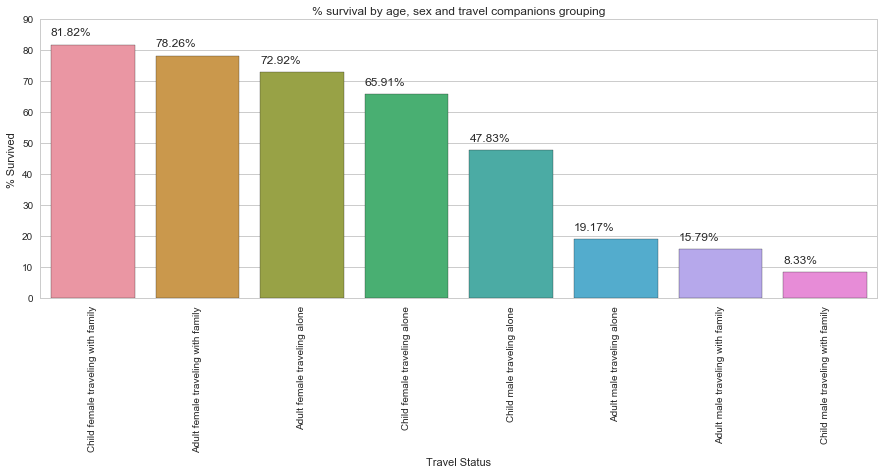

In [31]:
# format plot
fig, (axis1) = plt.subplots(1,figsize=(15,5))
plt.xticks(rotation=90)
sns.set(style="whitegrid", color_codes=True)

group_compare_plot = sns.barplot\
(x='GroupName', y='SurvivalRate', data=group_compare_df.sort_values(['SurvivalRate'], ascending=[0]), ax=axis1)

for p in group_compare_plot.patches:
    height = p.get_height()
    group_compare_plot.text(p.get_x(), height+ 3, '%1.2f%%'%(height))
    
# add titles
group_compare_plot.axes.set_title('% survival by age, sex and travel companions grouping')
group_compare_plot.set_xlabel("Travel Status")
group_compare_plot.set_ylabel("% Survived")

## Did the passenger's Sex play any role in their chance of survival?
> Now let's look at each one of the passenger attributes individually and compare survival rates based on those attributes.

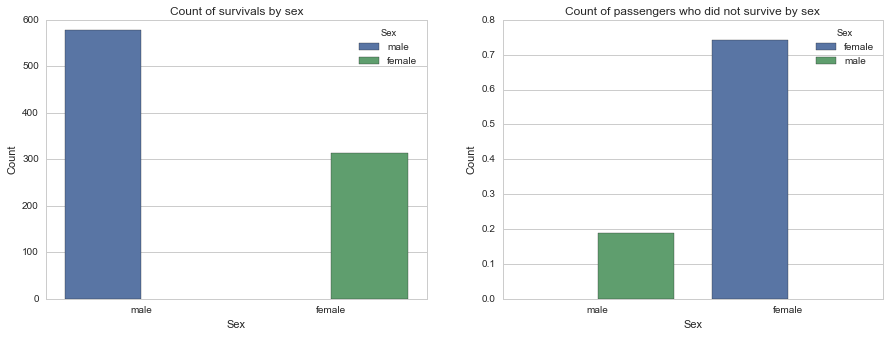

In [32]:
# Count of Passengers by Sex
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
axis1 = sns.countplot(x='Sex', data=titanic_df, ax=axis1, hue='Sex')
# add titles
axis1.axes.set_title('Count of survivals by sex')
axis1.set_xlabel("Sex")
axis1.set_ylabel("Count")

# average of survived by Sex
grouped_by_sex = titanic_df[['Sex', 'SurvivedTF']].groupby(['Sex'],as_index=False).mean()
axis2 = sns.barplot(x='Sex', y='SurvivedTF', data=grouped_by_sex, hue='Sex', ax=axis2, order=['male','female'])

# add titles
axis2.axes.set_title('Count of passengers who did not survive by sex')
axis2.set_xlabel("Sex")
axis2.set_ylabel("Count")

## Overall Distribution by Sex

,Sex,PassengerId
0,female,314
1,male,577


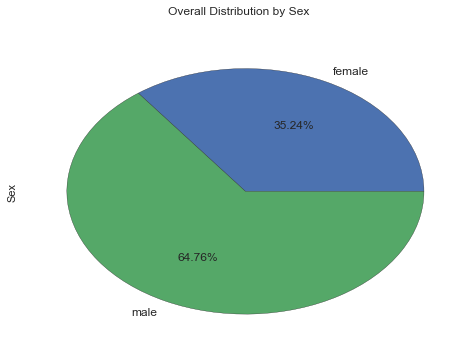

In [33]:
titanic_df.groupby(['Sex'], as_index=True)['Sex'].count() \
.plot.pie(subplots=True, title='Overall Distribution by Sex', autopct='%.2f%%', fontsize=12)
titanic_df.groupby(['Sex'], as_index=False)['PassengerId'].count()

## % of Sex of Passengers Who Survived

,Sex,PassengerId
0,female,233
1,male,109


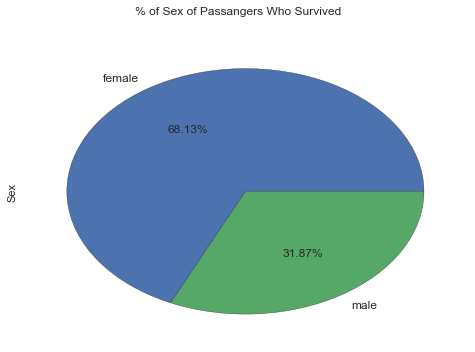

In [34]:
madeit_df.groupby(['Sex'], as_index=True)['Sex'].count() \
.plot.pie(subplots=True, title='% of Sex of Passangers Who Survived', autopct='%.2f%%', fontsize=12)
madeit_df.groupby(['Sex'], as_index=False)['PassengerId'].count()

## % of Sex of Passengers who did not Survived

,Sex,PassengerId
0,female,81
1,male,468


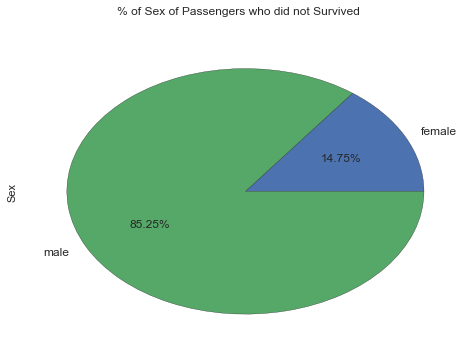

In [35]:
didnt_df.groupby(['Sex'], as_index=True)['Sex'].count() \
.plot.pie(subplots=True, title='% of Sex of Passengers who did not Survived', autopct='%.2f%%', fontsize=12)
didnt_df.groupby(['Sex'], as_index=False)['PassengerId'].count()

## Did the passenger's Age play any role in their chance of survival?

> Per our earlier finding, only 714 out of the 891 passengers on the roster have an age specified in the data set. The matplotlib library automatically excludes any NaN values when displaying histograms and bar plots and these passengers are not included in the age distribution graph you see below.

> For the purpose of evaluating if the passenger is an Adult or a Child we assume that passengers without an age are adults since the average age of the passengers is 29.7 years.


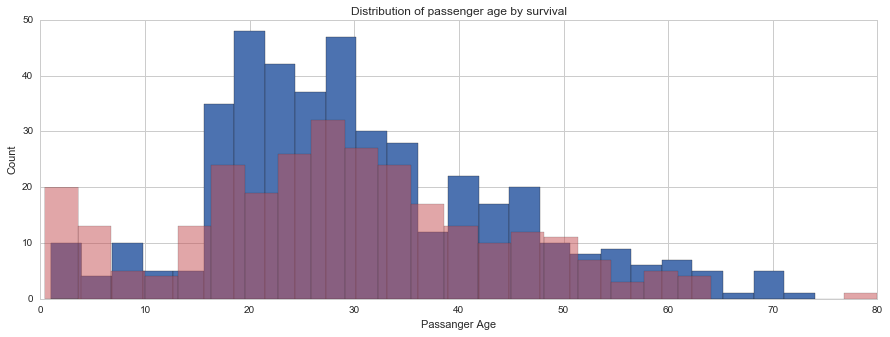

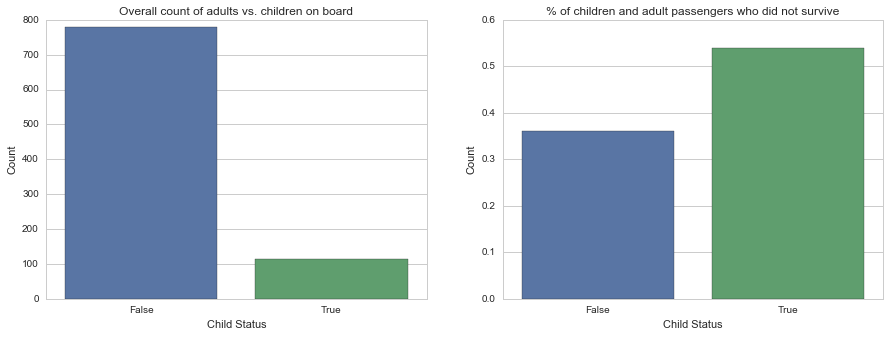

In [36]:
# Survival Rate by Age

fig, (axis1) = plt.subplots(1,figsize=(15,5))

didnt_df['Age'].hist(bins=25)
madeit_df['Age'].hist(bins=25, color = 'r', alpha=0.50)
plt.xlabel('Passanger Age')
plt.ylabel('Count')
plt.title('Distribution of passenger age by survival')


# Count of Adults / Children
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Child', data=titanic_df, ax=axis1)

# add titles
axis1.axes.set_title('Overall count of adults vs. children on board')
axis1.set_xlabel("Child Status")
axis1.set_ylabel("Count")

# average of survived by Sex
grouped_by_age = titanic_df[['Child', 'Survived']].groupby(['Child'],as_index=False).mean()
sns.barplot(x='Child', y='Survived', data=grouped_by_age, ax=axis2, order=[False,True])

# add titles
axis2.axes.set_title('% of children and adult passengers who did not survive')
axis2.set_xlabel("Child Status")
axis2.set_ylabel("Count")

> The above graphs show the children were given priority when the Titanic was evacuated. Even though children represented approx. 1/8 of the passengers, more than 50% of the survivors were under 18.


## Did the amount payed by the passenger for their ticket play any role in their chance of survival?

> The average price ticket paid by survivors vs non-survivors is almost double.

In [37]:
# Survival Rate by Fare
titanic_df.groupby(['SurvivedTF'], as_index=False)['Fare'].mean()

,SurvivedTF,Fare
0,False,22.117887
1,True,48.395408


,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


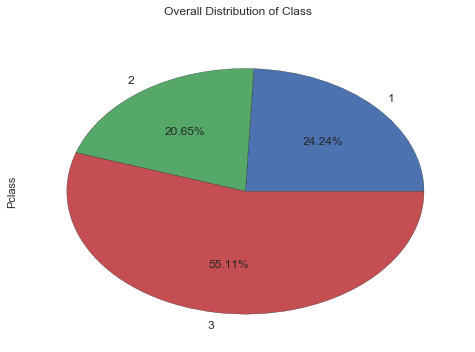

In [38]:
titanic_df.groupby(['Pclass'], as_index=True)['Pclass'].count() \
.plot.pie(subplots=True, title='Overall Distribution of Class', autopct='%.2f%%', fontsize=12)
titanic_df.groupby(['Pclass'], as_index=False)['PassengerId'].count()

,Pclass,PassengerId
0,1,136
1,2,87
2,3,119


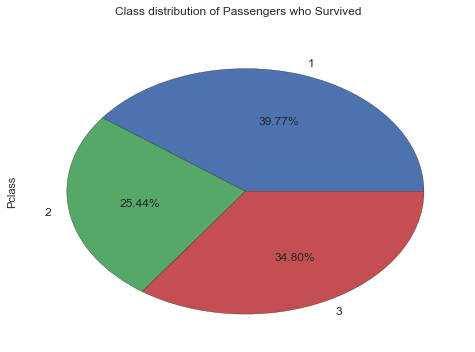

In [39]:
madeit_df.groupby(['Pclass'], as_index=True)['Pclass'].count() \
.plot.pie(subplots=True, title='Class distribution of Passengers who Survived', autopct='%.2f%%', fontsize=12)
madeit_df.groupby(['Pclass'], as_index=False)['PassengerId'].count()

,Pclass,PassengerId
0,1,80
1,2,97
2,3,372


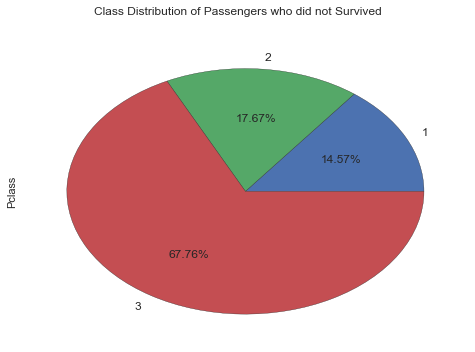

In [40]:
didnt_df.groupby(['Pclass'], as_index=True)['Pclass'].count() \
.plot.pie(subplots=True, title='Class Distribution of Passengers who did not Survived', autopct='%.2f%%', fontsize=12)
didnt_df.groupby(['Pclass'], as_index=False)['PassengerId'].count()

> Looking at the above pie charts that compare the overall distribution of class among the passengers and the distribution of class among survivors and non-survivors, it seems that even though the passengers in class 3 represented 55% of the overall count, they only represent 35% of the passengers who survived. Combined with the difference in average ticket price paid by survivors vs. non-survivors, it seems that status did play a role in the passengers’ chance of survival.

## Do passengers with family members aboard have a higher survival rate?

> It seems that travelling alone reduced the passengers' chance of survival. It's possible that since not many women or children were traveling alone the lower number of survival among passengers who traveled alone is due to the "Women and Children First" policy.


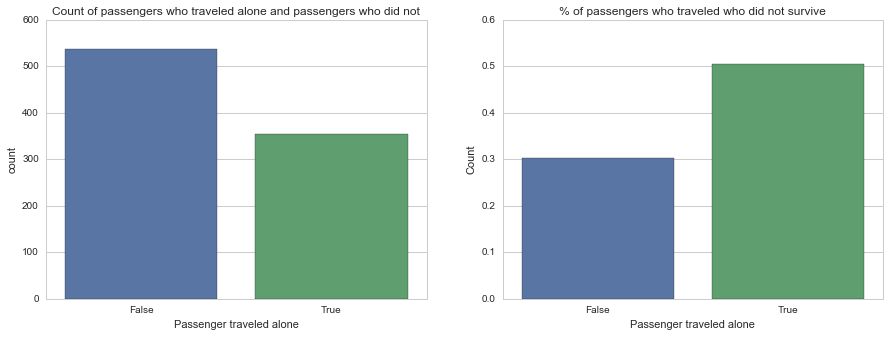

In [41]:
# Count of passengers without family members on board
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Alone', data=titanic_df, ax=axis1)
# add titles
axis1.axes.set_title('Count of passengers who traveled alone and passengers who did not')
axis1.set_xlabel("Passenger traveled alone")
axis2.set_ylabel("Count")


# Survival rate of passengers without family members
grouped_by_age = titanic_df[['Alone', 'Survived']].groupby(['Alone'],as_index=False).mean()
sns.barplot(x='Alone', y='Survived', data=grouped_by_age, ax=axis2, order=[False,True])

# add titles
axis2.axes.set_title('% of passengers who traveled who did not survive')
axis2.set_xlabel("Passenger traveled alone")
axis2.set_ylabel("Count")

# Conclusion

> This project evaluated the Titanic passenger manifest provided by [kaggle](https://www.kaggle.com/c/titanic/data). This data set includes detailed information about the passengers aboard the Titanic on her maiden and last voyage across the North Atlantic Ocean. The dataset includes not only passenger information like Age, Sex, Class and cost of ticket, but also an indicator if the passenger survived or not. The data set also includes data indicating if the passenger traveled alone or not.

> Analyzing the data brought to light a few minor issues that had to be accommodated for, like missing age values for 177 out of the 891 passengers. While evaluating the adult status of each patient, these passengers were treated as adults due to the fact that the average age of passengers was 29.7 years. I believe this is sufficient for the purpose of this exercise, although in a real-world data analysis situation I would have most likely chosen to apply the same Adult/Child ratio to the group of passengers missing age values as the group of passengers that had those values. Overall, only 1/7 of the passengers with age values were under 18 so I believe my choice had no significant impact on our age based survival rate results since those already leaned heavily towards children.

## The following questions were identified for the purpose of this project:

**Did the passenger's Sex play any role in their chance of survival?**
> We divided our data set into 8 passenger groups and compared their survival rates based on Sex, Age (Adult vs. Child), and whether or not they traveled alone. Of those 8 groups, 4 grouped male passengers and 4 grouped female passengers. looking at our "% survival by age, sex and travel companions grouping" chart, it is clearly that sex had a very significant impact on a passenger’s survival rate since the top 4 groups with the highest survival rates all included female passengers only.

**Did the passenger's Age play any role in their chance of survival?**
> As mentioned above and visible in the "Overall count of adults vs. children on board" and "% of children and adult passengers who did not survive" graphs, it seems that children were given priority when the Titanic was evacuated. Even though children represented approx. 1/8 of the passengers, more than 50% of the survivors were under 18.

**Did the amount payed by the passenger for their ticket play any role in their chance of survival?**
> Based on the findings in the "Survival Rate by Fare" table, average price ticket paid by survivors vs non-survivors is almost double. Combining that data with the pie charts showing the distribution of overall, surviving and non-surviving passengers across the 3 classes, I believe there was a connection between price ticket and survival rate (passengers in class 3 represented 55% of the overall count, they only represent 35% of the passengers who survived). Since children had a much higher rate of survival, and most of them did not travel alone, this result may be tied to the fact that a traveling family would have to pay a higher price for the multiple tickets that by itself may indicate a higher income class. This can also be an indication of class privilege that benefitted richer passengers. More analysis is needed to make that determination.

**Do passengers with any family members aboard have a higher survival rate?**
> Travelling alone seemed to have an impact on survivability of Titanic passengers. It is possible that this is the results of the disproportionate percent of Men that were not evacuated if at the time Men were more likely to travel alone. Just like with the Fare analysis, more research is needed to make that conclusion.


## Additional Investigation Points

> When analyzing this dataset, the following additional questions came to mind:
- was there a relation between the overall financial status of the passenger and their chances of surviving?
- How many passengers did not survive in the life boats compared to the ones that were left on the titanic?
- Was it easier/harder to reach the life boats from the area where class 3 passengers were occupying?
- Among passengers who traveled together, how many of them survived along with their entire travel group?
